Importacion de Librerias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

In [46]:
# Carga de archivo merge de toda la data (csv)
all_data_merge = pd.read_csv("Data/all_data_merge.csv")

In [47]:
all_data_merge['recommend'] = all_data_merge['recommend'].apply(lambda x: 1 if x else 0)
all_data_merge

,id,user_id,item_id,title,genres,developer,release_date,price,recommend,year,sentiment_analysis,playtime_forever
0,7656119797098247922200,76561197970982479,22200,Zeno Clash,Action,ACE Team,2009-04-21,9.99,1,2011,2,271
1,765611979709824791250,76561197970982479,1250,Killing Floor,Action,Tripwire Interactive,2009-05-14,19.99,1,2011,1,10006
2,js41637227300,js41637,227300,Euro Truck Simulator 2,Indie,SCS Software,2013-01-16,19.99,1,2013,1,551
3,js41637239030,js41637,239030,"Papers, Please",Adventure,3909,2013-08-08,9.99,1,2013,1,349
4,evcentric107200,evcentric,107200,Space Pirates and Zombies,Action,MinMax Games Ltd.,2011-08-15,9.99,1,2014,1,3225
...,...,...,...,...,...,...,...,...,...,...,...,...
32539,76561198239215706730,76561198239215706,730,Counter-Strike: Global Offensive,Action,Valve,2012-08-21,14.99,1,2015,1,4659
32540,wayfeng730,wayfeng,730,Counter-Strike: Global Offensive,Action,Valve,2012-08-21,14.99,1,2015,1,42740
32541,76561198251004808253980,76561198251004808,253980,Enclave,RPG,Starbreeze,2003-03-10,4.99,1,2015,2,1098
32542,72947282842730,72947282842,730,Counter-Strike: Global Offensive,Action,Valve,2012-08-21,14.99,1,2015,0,33


Informacion de las tablas de cada archivo

In [60]:
all_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32544 entries, 0 to 32543
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  32544 non-null  object 
 1   user_id             32544 non-null  object 
 2   item_id             32544 non-null  int64  
 3   title               32544 non-null  object 
 4   genres              32544 non-null  object 
 5   developer           32544 non-null  object 
 6   release_date        32544 non-null  object 
 7   price               32544 non-null  float64
 8   recommend           32544 non-null  int64  
 9   year                32544 non-null  int64  
 10  sentiment_analysis  32544 non-null  int64  
 11  playtime_forever    32544 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.0+ MB


In [49]:
all_data_merge.describe()

,item_id,price,recommend,year,sentiment_analysis,playtime_forever
count,32544.000000,32544.000000,32544.000000,32544.000000,32544.000000,32544.000000
mean,166253.825805,14.739926,0.911935,2014.201297,1.218320,9611.999140
std,123120.553576,13.764446,0.283394,0.820682,0.581016,23126.545148
min,10.000000,0.000000,0.000000,2010.000000,0.000000,0.000000
25%,17470.000000,6.990000,1.000000,2014.000000,1.000000,428.000000
50%,212480.000000,14.990000,1.000000,2014.000000,1.000000,1604.000000
75%,252490.000000,19.990000,1.000000,2015.000000,2.000000,6992.250000
max,428880.000000,771.710000,1.000000,2015.000000,2.000000,642773.000000


In [50]:
# descripcion de variables categoricas
all_data_merge['id'].value_counts()
    # un identificador unico para cada user que jugó duferentes juegos

id
76561198027488037105600    9
blablabla174730            9
76561198045953692261030    9
76561198092735015273110    4
chicken_tonight285900      4
                          ..
76561198060207360270450    1
76561198060207360219150    1
76561198082794606212070    1
subsonicsnigger320140      1
ApxLGhost730               1
Name: count, Length: 31136, dtype: int64

In [51]:
all_data_merge['user_id'].value_counts()

user_id
76561198064484479    32
MinerKnight          28
nitr0ticwolf         28
76561198094665607    28
chicken_tonight      28
                     ..
Nuep                  1
JakKnifez             1
Totalfire_            1
169420666             1
ApxLGhost             1
Name: count, Length: 16200, dtype: int64

In [52]:
all_data_merge['item_id'].value_counts()

item_id
730       2814
4000      1462
304930     845
550        639
105600     629
          ... 
215710       1
259550       1
265330       1
296650       1
307130       1
Name: count, Length: 2063, dtype: int64

In [53]:
all_data_merge['title'].value_counts()

title
Counter-Strike: Global Offensive    2814
Garry's Mod                         1462
Unturned                             845
Left 4 Dead 2                        639
Terraria                             629
                                    ... 
Fieldrunners 2                         1
Hero of the Kingdom                    1
Gomo                                   1
The Great Jitters: Pudding Panic       1
Asteria                                1
Name: count, Length: 2063, dtype: int64

In [55]:
all_data_merge['developer'].value_counts()

developer
Valve                    4449
Facepunch Studios        2070
Bohemia Interactive       937
Smartly Dressed Games     845
Re-Logic                  629
                         ... 
GlyphX Games                1
Teyon                       1
Gaming Minds                1
Wanako Games                1
Legend Studio               1
Name: count, Length: 1524, dtype: int64

In [57]:
all_data_merge['genres'].value_counts()

genres
Action                       23761
Indie                         3147
Adventure                     2045
Strategy                       994
Casual                         966
RPG                            594
Free to Play                   402
Simulation                     359
Racing                         192
Massively Multiplayer           31
Animation &amp; Modeling        20
Utilities                       12
Sports                          10
Design &amp; Illustration        8
Audio Production                 2
Video Production                 1
Name: count, dtype: int64

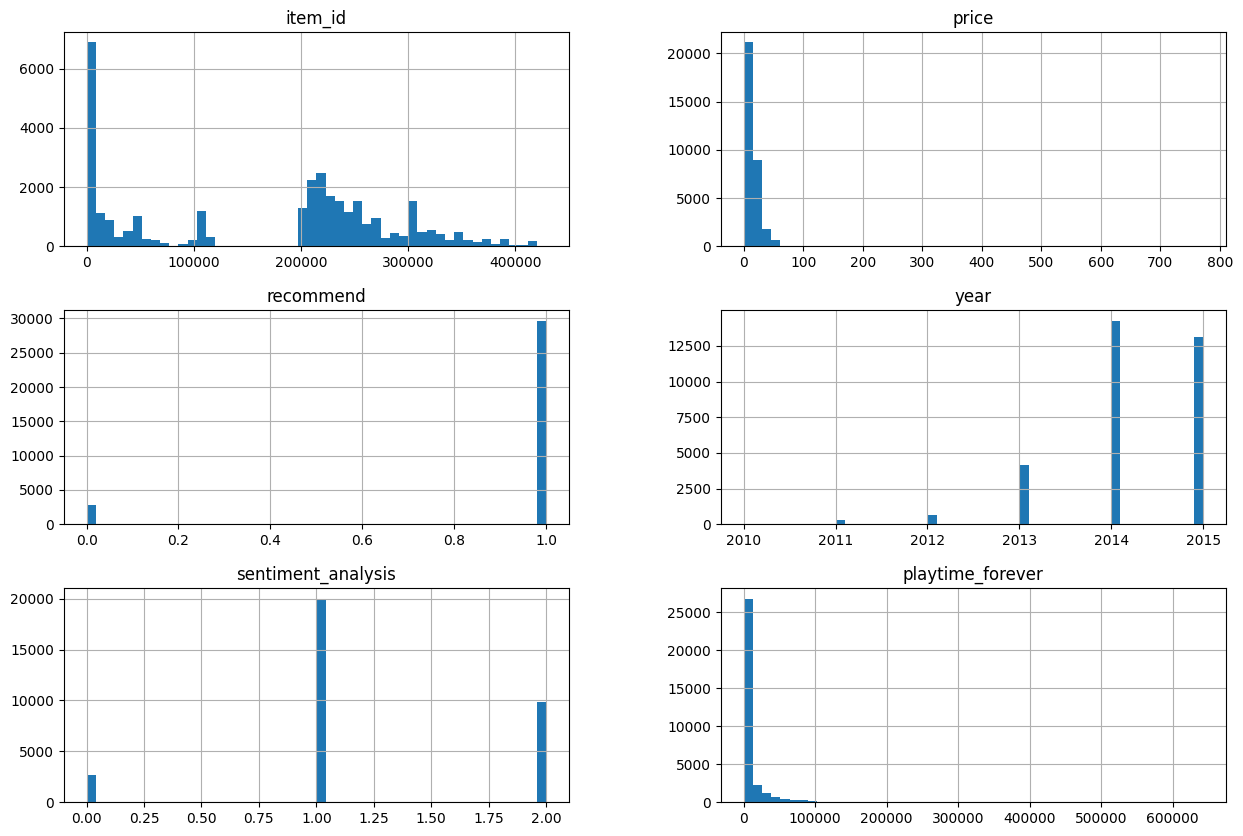

In [59]:
all_data_merge.hist(bins=50, figsize=(15,10))
plt.show()